In [65]:
# Import Dependencies 


import json
import requests
import os
import pandas as pd
import scipy.stats as st
from scipy.stats import normaltest 
import numpy as np
from scipy.stats import linregress
import numpy as np
#from sklearn import datasets
import matplotlib.pyplot as plt

# Study data files
# name the csv file 
health_data_path= "Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (version 1).csv"


# Read the Nutrition data
read_data = pd.read_csv(health_data_path)

read_data.head()

#44201- ozone 
#42101 - Carbon monoxide 


,"eek, an",YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
2,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"Less than $15,000",INC,INCLESS15
3,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$35,000 - $49,999",INC,INC3550
4,2011,2011,AK,Alaska,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,Hispanic,RACE,RACEHIS


In [33]:
# Filter the csv file to take only Location, Year, Question and Data Value and aggregate in to a data frame 

new_df = pd.DataFrame(read_data[["YearEnd","LocationDesc","Question","Data_Value"]])

clean_df = new_df.loc[new_df.YearEnd == 2017]

clean_df = clean_df.dropna()

clean_df


,YearEnd,LocationDesc,Question,Data_Value
8961,2017,Alaska,Percent of adults aged 18 years and older who ...,34.3
8962,2017,Alaska,Percent of adults aged 18 years and older who ...,27.5
8963,2017,Alaska,Percent of adults aged 18 years and older who ...,31.4
8965,2017,Alaska,Percent of adults aged 18 years and older who ...,29.8
8966,2017,Alaska,Percent of adults aged 18 years and older who ...,26.1
...,...,...,...,...
63023,2017,Wyoming,Percent of adults who report consuming vegetab...,10.6
63024,2017,Wyoming,Percent of adults who report consuming vegetab...,15.3
63025,2017,Wyoming,Percent of adults who report consuming vegetab...,23.8
63026,2017,Wyoming,Percent of adults who report consuming vegetab...,15.0


In [3]:
# group the data frame by State and Question



mean = clean_df.groupby(["Question", "LocationDesc"]).mean()["Data_Value"].reset_index()

# take the variable mean into a data frame 
health_data = pd.DataFrame(mean)


# rename columns 
final_health_data = health_data.rename(columns={"LocationDesc":"state","Data_Value":"Question - %Average"})


# drop puerto rico and virgin islands ( they are outliers )

final_health_data = final_health_data[(final_health_data.state != "Puerto Rico")&(final_health_data.state != "Virgin islands")]
final_health_data                     
                            

,Question,state,Question - %Average
0,Percent of adults aged 18 years and older who ...,Alabama,33.792000
1,Percent of adults aged 18 years and older who ...,Alaska,31.858333
2,Percent of adults aged 18 years and older who ...,Arizona,34.707407
3,Percent of adults aged 18 years and older who ...,Arkansas,36.272000
4,Percent of adults aged 18 years and older who ...,California,35.670370
...,...,...,...
481,Percent of adults who report consuming vegetab...,Virginia,17.003846
482,Percent of adults who report consuming vegetab...,Washington,18.748148
483,Percent of adults who report consuming vegetab...,West Virginia,18.804348
484,Percent of adults who report consuming vegetab...,Wisconsin,20.469231


In [34]:

# create a df with each of the last 3 questions from the csv file 

# group by 

q7 = final_health_data.loc[final_health_data.Question == "Percent of adults who engage in no leisure-time physical activity"]


q7.head()
 
for col in q7:
    print(col)



Question
state
Question - %Average


In [35]:
q8 = final_health_data.loc[final_health_data.Question == "Percent of adults who report consuming fruit less than one time daily"]

q8.head()


,Question,state,Question - %Average
378,Percent of adults who report consuming fruit l...,Alabama,44.588000
379,Percent of adults who report consuming fruit l...,Alaska,38.537500
380,Percent of adults who report consuming fruit l...,Arizona,37.511111
381,Percent of adults who report consuming fruit l...,Arkansas,44.064000
382,Percent of adults who report consuming fruit l...,California,33.592593


In [36]:
q9 = final_health_data.loc[final_health_data.Question == "Percent of adults who report consuming vegetables less than one time daily"]

q9.head()

,Question,state,Question - %Average
432,Percent of adults who report consuming vegetab...,Alabama,19.328000
433,Percent of adults who report consuming vegetab...,Alaska,21.375000
434,Percent of adults who report consuming vegetab...,Arizona,21.351852
435,Percent of adults who report consuming vegetab...,Arkansas,21.012000
436,Percent of adults who report consuming vegetab...,California,21.996296


In [37]:
# API Url's 
url = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=45201&bdate=20110101&edate=20111231&state=37"

url2= "https://aqs.epa.gov/data/api/list/states?email=lilu216@hotmail.com&key=baygoose48"

In [38]:
url = "https://aqs.epa.gov/data/api/qaBlanks/byState?email=test@aqs.api&key=test&param=88101&bdate=20180101&edate=20180131&state=01"
url_alabama_co = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=42602&bdate=20180101&edate=20181231&state=01"
response = requests.get(url_alabama_co).json()
print(json.dumps(response, indent=4, sort_keys=True))


{
    "Data": [
        {
            "arithmetic_mean": 8.185029,
            "cbsa": "Birmingham-Hoover, AL",
            "cbsa_code": "13820",
            "certification_indicator": "Certified",
            "city": "Birmingham",
            "county": "Jefferson",
            "county_code": "073",
            "date_of_last_change": "2019-02-26",
            "datum": "WGS84",
            "event_type": "No Events",
            "exceptional_data_count": 0,
            "fiftieth_percentile": 5.6,
            "first_max_datetime": "2018-06-07 06:00",
            "first_max_n_o_datetime": null,
            "first_max_nonoverlap_value": null,
            "first_max_value": 41.7,
            "fourth_max_datetime": "2018-04-05 20:00",
            "fourth_max_value": 40.4,
            "latitude": 33.553056,
            "local_site_name": "North Birmingham",
            "longitude": -86.815,
            "method": "Teledyne-API Model 200EUP or T200UP - Photolytic-Chemiluminescence",
            

In [9]:
#Pull No2 levels across all states ( take the average of each location in the state) 
# Compare max dates for when the most pollution is. 
state_query_url = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=42602&bdate=20170101&edate=20171231&state="

#need to pick the variables we want the measurements for and create a list for each to add to with a for loop.

states = []
mean = []
max_value = []




state_code = ["01", "02", "04", "05", "06", "08", "09", "10", "11", "12", "13", "15", "16", "17", "18", "19", "20", "21", "22", 
              "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41",
              "42", "44", "45", "46", "47", "48", "49", "50", "51", "53", "54", "55", "56", "66", "72", "78"]


for code in state_code:
    response = requests.get(state_query_url + code).json()
    try:
        states.extend([x['state'] for x in response['Data']])
        mean.extend([x['arithmetic_mean'] for x in response['Data']])
        max_value.extend([x['first_max_value'] for x in response['Data']])
    except: 
        print("This state has no data", code)
    
    


In [39]:
#create a data frame with info from your lists to combine into one dictionary
no2_dict = {
    "state": states,
    "NO2 average per state": mean,
    "NO2 Max Value per state": max_value
}

#print(no2_dict)

no_2_df = pd.DataFrame(no2_dict)
no_2_df.head()

,state,NO2 average per state,NO2 Max Value per state
0,Alabama,8.974158,40.8
1,Alabama,20.712610,40.8
2,Alabama,11.458696,50.8
3,Alabama,23.389298,50.8
4,Alaska,12.569094,65.7


In [40]:
#group the data frame by state and just take the average NO2 value per state 

no_3_df = no_2_df.groupby("state").agg({"NO2 average per state":"mean","NO2 Max Value per state":"max"}).reset_index()


no_3_df.rename(columns=''.join, inplace=True)

no_3_df.head()



,state,NO2 average per state,NO2 Max Value per state
0,Alabama,16.133691,50.8
1,Alaska,17.845126,65.7
2,Arizona,23.549218,72.0
3,Arkansas,12.625227,45.0
4,California,14.378532,123.3


In [12]:
for col in no_3_df.columns: 
    print(col) 

state
NO2 average per state
NO2 Max Value per state


In [41]:
# Start doing some analysis between the questions and the NO2 levels

# The 2 dfs we want are q7 and clean_df(No2)

# merge the 2 data frames - one from the csv file and the PAPI so we can drop the states that dont match both the dataframes
mergedq7_df=pd.merge(q7,no_3_df, on="state")

mergedq7_df.head()



,Question,state,Question - %Average,NO2 average per state,NO2 Max Value per state
0,Percent of adults who engage in no leisure-tim...,Alabama,32.412000,16.133691,50.8
1,Percent of adults who engage in no leisure-tim...,Alaska,21.308333,17.845126,65.7
2,Percent of adults who engage in no leisure-tim...,Arizona,26.059259,23.549218,72.0
3,Percent of adults who engage in no leisure-tim...,Arkansas,33.324000,12.625227,45.0
4,Percent of adults who engage in no leisure-tim...,California,20.700000,14.378532,123.3


In [42]:
#Function to run scatter plot and regression 


def scatter_plot(x_axis, y_axis, show_regress=True, suptitle="", title="", xlabel="", ylabel=""):
    plt.scatter(x_axis, y_axis)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    regress_line = x_axis * slope + intercept
    plt.plot(x_axis,regress_line,"r-")
    plt.annotate(line_eq,(x_axis.mean(),y_axis.mean()),fontsize=16,color="red")
    x_axis.mean()
    y_axis.mean()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.suptitle(suptitle)
    plt.title(title)
    plt.grid()
    print(f"The r-squared is: {rvalue}")

The r-squared is: -0.001049385747389123


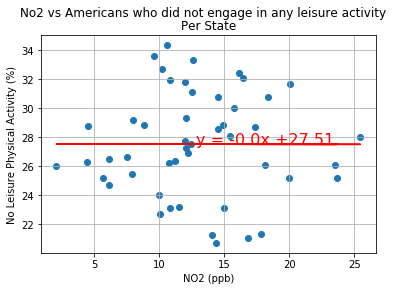

The correlation between percent of adults not engaging in leisure and average no2 in the air for the state is -0.09
-0.08856343114343387


In [90]:
# check if there is any correlation between percent of adults not engaging in leisure and average no2 in the air for the state


scatter_plot(mergedq7_df.iloc[:,3], mergedq7_df.iloc[:,2], True, "No2 vs Americans who did not engage in any leisure activity","Per State","NO2 (ppb)","No Leisure Physical Activity (%)")
plt.savefig("no lesiure vs No2.png")
plt.show()
print(f"The correlation between percent of adults not engaging in leisure and average no2 in the air for the state is {round(correlation[0],2)}")
print(rvalue)


In [15]:
# The 2 df we want are q8 and clean_df


mergedq8_df=pd.merge(q8,no_3_df, on="state")

mergedq8_df.head()


,Question,state,Question - %Average,NO2 average per state,NO2 Max Value per state
0,Percent of adults who report consuming fruit l...,Alabama,44.588000,16.133691,50.8
1,Percent of adults who report consuming fruit l...,Alaska,38.537500,17.845126,65.7
2,Percent of adults who report consuming fruit l...,Arizona,37.511111,23.549218,72.0
3,Percent of adults who report consuming fruit l...,Arkansas,44.064000,12.625227,45.0
4,Percent of adults who report consuming fruit l...,California,33.592593,14.378532,123.3


The r-squared is: -0.05830796751695769


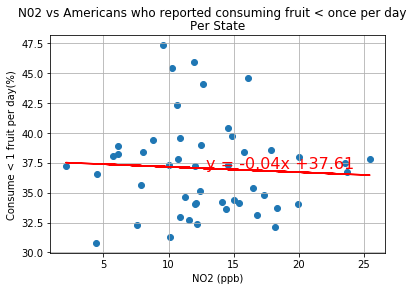

The correlation between Percent of adults who report consuming fruit less than one time daily on average per state and Average NO2 level in the air by State is -0.09
-0.08856343114343387


In [92]:
# check if there is any correlation between Percent of adults who report consuming fruit less than one time daily and average no2 in the air for the state


scatter_plot(mergedq8_df.iloc[:,3],mergedq8_df.iloc[:,2], True,"N02 vs Americans who reported consuming fruit < once per day", "Per State", "NO2 (ppb)","Consume < 1 fruit per day(%)")
plt.savefig("fruit less than once daily vs No2.png")


plt.show()

print(f"The correlation between Percent of adults who report consuming fruit less than one time daily on average per state and Average NO2 level in the air by State is {round(correlation[0],2)}")

print(rvalue)

In [85]:
# The 2 df we want are q9 and clean_df


mergedq9_df=pd.merge(q9,no_3_df, on="state")

mergedq9_df.head()





,Question,state,Question - %Average,NO2 average per state,NO2 Max Value per state
0,Percent of adults who report consuming vegetab...,Alabama,19.328000,16.133691,50.8
1,Percent of adults who report consuming vegetab...,Alaska,21.375000,17.845126,65.7
2,Percent of adults who report consuming vegetab...,Arizona,21.351852,23.549218,72.0
3,Percent of adults who report consuming vegetab...,Arkansas,21.012000,12.625227,45.0
4,Percent of adults who report consuming vegetab...,California,21.996296,14.378532,123.3


The r-squared is: 0.32512061492644095


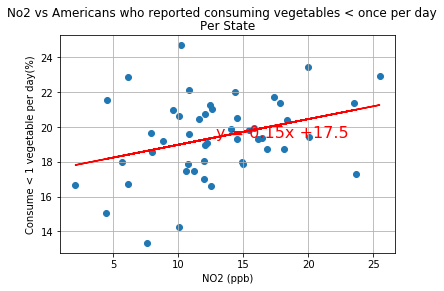

The correlation between Percent of adults who report consuming veggies less than one time daily on average per state & Average NO2 level in the air by State is -0.09
-0.08856343114343387


In [93]:
# check if there is any correlation between Percent of adults who report consuming vegetables less than one time daily and average no2 in the air for the state


scatter_plot(mergedq9_df.iloc[:,3],mergedq9_df.iloc[:,2], True,"No2 vs Americans who reported consuming vegetables < once per day", "Per State", "NO2 (ppb)","Consume < 1 vegetable per day(%)")

plt.savefig("veggie less than once daily vs No2.png")


plt.show()

print(f"The correlation between Percent of adults who report consuming veggies less than one time daily on average per state & Average NO2 level in the air by State is {round(correlation[0],2)}")


print(rvalue)

In [19]:
# look at Mississippi, Oklahoma, Iowa, Lousiana, Arkansas because BMI for these states >35

# compare average air qualities and the nutrition and behavior questions for these states 

# Get those states from both the clean_df and final_health_data

no2_obesity_df = no_3_df.loc[(no_3_df["state"] == "Oklahoma")|(no_3_df["state"] == "Iowa")|(no_3_df["state"] == "Arkansas")|(no_3_df["state"] == "Lousiana")|(no_3_df["state"] == "Mississippi"),:]

no2_obesity_df                              
                               
health_obesity_dfq7 = q7.loc[(q7["state"] == "Oklahoma")|(q7["state"] == "Iowa")|(q7["state"] == "Arkansas")|(q7["state"] == "Lousiana")|(q7["state"] == "Mississippi"),:]

health_obesity_dfq7                                                           
                               

,Question,state,Question - %Average
327,Percent of adults who engage in no leisure-tim...,Arkansas,33.324000
340,Percent of adults who engage in no leisure-tim...,Iowa,25.448000
349,Percent of adults who engage in no leisure-tim...,Mississippi,33.575000
362,Percent of adults who engage in no leisure-tim...,Oklahoma,31.773077


In [20]:
q7merged_df = pd.merge(health_obesity_dfq7 ,no2_obesity_df,on="state")

#del q7merged_df[('state', '')]

q7merged_df

,Question,state,Question - %Average,NO2 average per state,NO2 Max Value per state
0,Percent of adults who engage in no leisure-tim...,Arkansas,33.324000,12.625227,45.0
1,Percent of adults who engage in no leisure-tim...,Iowa,25.448000,7.888254,78.4
2,Percent of adults who engage in no leisure-tim...,Mississippi,33.575000,9.603663,53.0
3,Percent of adults who engage in no leisure-tim...,Oklahoma,31.773077,11.982937,67.0


The r-squared is: 0.7321738102263355


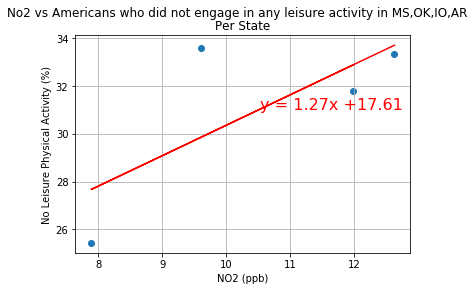

The correlation between both factors is -0.09


In [94]:
# check if there is any correlation between percent of adults not engaging in leisure and average no2 in the air for the states where BMI > 30

# look at  Mississippi, Oklahoma, Iowa, Lousiana, Arkansas 



scatter_plot(q7merged_df.iloc[:,3],q7merged_df.iloc[:,2], True,"No2 vs Americans who did not engage in any leisure activity in MS,OK,IO,AR", "Per State", "NO2 (ppb)","No Leisure Physical Activity (%)")

plt.savefig("No leisure physical activity for 4 states vs No2.png")


plt.show()

print(f"The correlation between both factors is {round(correlation[0],2)}")





In [56]:
#Pull ozone levels across all states ( take the average of each location in the state) 
# Compare max dates for when the most pollution is. 



query_url = "https://aqs.epa.gov/data/api/annualData/byState?email=lilu216@hotmail.com&key=baygoose48&param=44201&bdate=20170101&edate=20171231&state="

#need to pick the variables we want the measurements for and create a list for each to add to with a for loop.

states_o = []
mean_o = []
max_value_o = []




state_code = ["01", "02", "04", "05", "06", "08", "09", "10", "11", "12", "13", "15", "16", "17", "18", "19", "20", "21", "22", 
              "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41",
              "42", "44", "45", "46", "47", "48", "49", "50", "51", "53", "54", "55", "56", "66", "72", "78"]


for code in state_code:
    response = requests.get(query_url + code).json()
    try:
        states_o.extend([x['state'] for x in response['Data']])
        mean_o.extend([x['arithmetic_mean'] for x in response['Data']])
        max_value_o.extend([x['first_max_value'] for x in response['Data']])
    except: 
        print("This state has no data", code)


In [57]:
#create a data frame with info from your lists to combine into one dictionary
ozone_dict = {
    "state": states_o,
    "Ozone average per state": mean_o,
    "Ozone Max Value per state": max_value_o
}

#print(no2_dict)

ozone_df = pd.DataFrame(ozone_dict)
ozone_df.head()

,state,Ozone average per state,Ozone Max Value per state
0,Alabama,0.042644,0.094
1,Alabama,0.037255,0.078
2,Alabama,0.037255,0.078
3,Alabama,0.037174,0.078
4,Alabama,0.044493,0.083


In [24]:
#group the data frame by state and just take the average ozone value per state 

final_ozone = ozone_df.groupby("state").agg({"Ozone average per state":"mean","Ozone Max Value per state":"max"}).reset_index()


final_ozone.rename(columns=''.join, inplace=True)

final_ozone.head()



,state,Ozone average per state,Ozone Max Value per state
0,Alabama,0.040627,0.094
1,Alaska,0.028044,0.054
2,Arizona,0.049570,0.114
3,Arkansas,0.041574,0.093
4,California,0.046155,0.158


In [58]:
# Merge the ozone df with each of the 3 questions to check if there is a correlation with ozone 

# Start doing some analysis between the questions and the ozone levels

# The 2 df we want are q7 and ozone_df(ozone)

# merge the 2 data frames - one from the csv file and the API so we can drop the states that dont match both the dataframes

# merge q7 and ozone data frame 
ozoneq7_df=pd.merge(q7,final_ozone, on="state")

ozoneq7_df.head()





,Question,state,Question - %Average,Ozone average per state,Ozone Max Value per state
0,Percent of adults who engage in no leisure-tim...,Alabama,32.412000,0.040627,0.094
1,Percent of adults who engage in no leisure-tim...,Alaska,21.308333,0.028044,0.054
2,Percent of adults who engage in no leisure-tim...,Arizona,26.059259,0.049570,0.114
3,Percent of adults who engage in no leisure-tim...,Arkansas,33.324000,0.041574,0.093
4,Percent of adults who engage in no leisure-tim...,California,20.700000,0.046155,0.158


The r-squared is: -0.026488473580178966


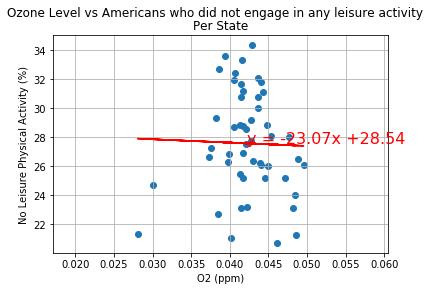

The correlation between Percent of adults who engage in no leisure-time physical activity on average per state and Average O2 level in the air by State  is -0.09


In [95]:
# check if there is any correlation between percent of adults not engaging in leisure and average ozone in the air for the state

scatter_plot(ozoneq7_df.iloc[:,3], ozoneq7_df.iloc[:,2], True,"Ozone Level vs Americans who did not engage in any leisure activity", "Per State", "O2 (ppm)","No Leisure Physical Activity (%)")


plt.savefig("No Leisure activity vs O2.png")

plt.show()

print(f"The correlation between Percent of adults who engage in no leisure-time physical activity on average per state and Average O2 level in the air by State  is {round(correlation[0],2)}")


In [27]:

# merge q8 and ozone data frame 
ozoneq8_df=pd.merge(q8,final_ozone, on="state")

ozoneq8_df.head()


,Question,state,Question - %Average,Ozone average per state,Ozone Max Value per state
0,Percent of adults who report consuming fruit l...,Alabama,44.588000,0.040627,0.094
1,Percent of adults who report consuming fruit l...,Alaska,38.537500,0.028044,0.054
2,Percent of adults who report consuming fruit l...,Arizona,37.511111,0.049570,0.114
3,Percent of adults who report consuming fruit l...,Arkansas,44.064000,0.041574,0.093
4,Percent of adults who report consuming fruit l...,California,33.592593,0.046155,0.158


In [28]:
#ozoneq8_df.dtypes()

The r-squared is: -0.056601537067983494


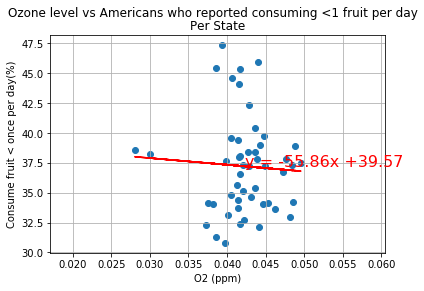

The correlation between Percent of adults who report consuming fruit less than one time daily on average per state and Average O2 level in the air by State is -0.09


In [96]:
# check if there is any correlation between Percent of adults who report consuming fruit less than one time daily and average ozone in the air for the state

scatter_plot(ozoneq8_df.iloc[:,3],ozoneq8_df.iloc[:,2],True,"Ozone level vs Americans who reported consuming <1 fruit per day", "Per State", "O2 (ppm)","Consume fruit < once per day(%)")

plt.savefig("Fruit less than once daily vs O2.png")

plt.show()

print(f"The correlation between Percent of adults who report consuming fruit less than one time daily on average per state and Average O2 level in the air by State is {round(correlation[0],2)}")

In [30]:
# merge q9 and ozone data frame 
ozoneq9_df=pd.merge(q9,final_ozone, on="state")

ozoneq9_df.head()


,Question,state,Question - %Average,Ozone average per state,Ozone Max Value per state
0,Percent of adults who report consuming vegetab...,Alabama,19.328000,0.040627,0.094
1,Percent of adults who report consuming vegetab...,Alaska,21.375000,0.028044,0.054
2,Percent of adults who report consuming vegetab...,Arizona,21.351852,0.049570,0.114
3,Percent of adults who report consuming vegetab...,Arkansas,21.012000,0.041574,0.093
4,Percent of adults who report consuming vegetab...,California,21.996296,0.046155,0.158


The r-squared is: -0.08856343114343387


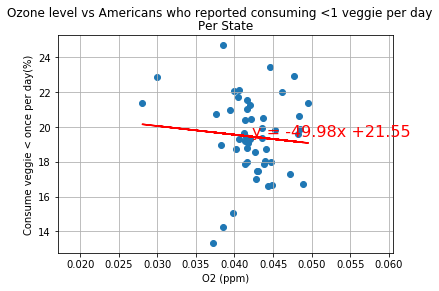

-0.08856343114343387
The correlation between Percent of adults who report consuming vegetable less than one time daily on average per state and Average O2 level in the air by State is -0.09


In [100]:
# check if there is any correlation between Percent of adults who report consuming vegetable less than one time daily and average ozone in the air for the state


scatter_plot(ozoneq9_df.iloc[:,3],ozoneq9_df.iloc[:,2], True,"Ozone level vs Americans who reported consuming <1 veggie per day", "Per State", "O2 (ppm)","Consume veggie < once per day(%)")

plt.savefig("Veggie less than once daily vs O2.png")
plt.show()
print (rvalue)

print(f"The correlation between Percent of adults who report consuming vegetable less than one time daily on average per state and Average O2 level in the air by State is {round(correlation[0],2)}")